In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def read_point_cloud(path):
    with open(path, 'r') as f:
        translation = list(map(float,f.readline().strip().split(',')))
        rotation = [ list(map(float,f.readline().strip().split(','))) for i in range(3) ]
        points = [ list(map(float,ln.strip().split(',')))[1:] for ln in f ]
        return np.array(translation), np.array(rotation), np.array(points)

translation, rotation, points = read_point_cloud('../sample_data/VelodyneDevice32c/0.txt')

# points = np.dot(rotation, points.transpose()) + translation.reshape((3, 1))
points = points.transpose()

## Problem 1 Histogram
### Range
The distribution of range seems to be a half of a normal distribution. Most points are in the range less than 50 meters. However, there are a few points as far as 200 meters.
### Heights
Most points have negative height, because the LiDAR is on top of a car, so most points on the ground is in 0 to -2 meters. There are only a few points have positive points, correspoding to trees, traffic lights and so on.

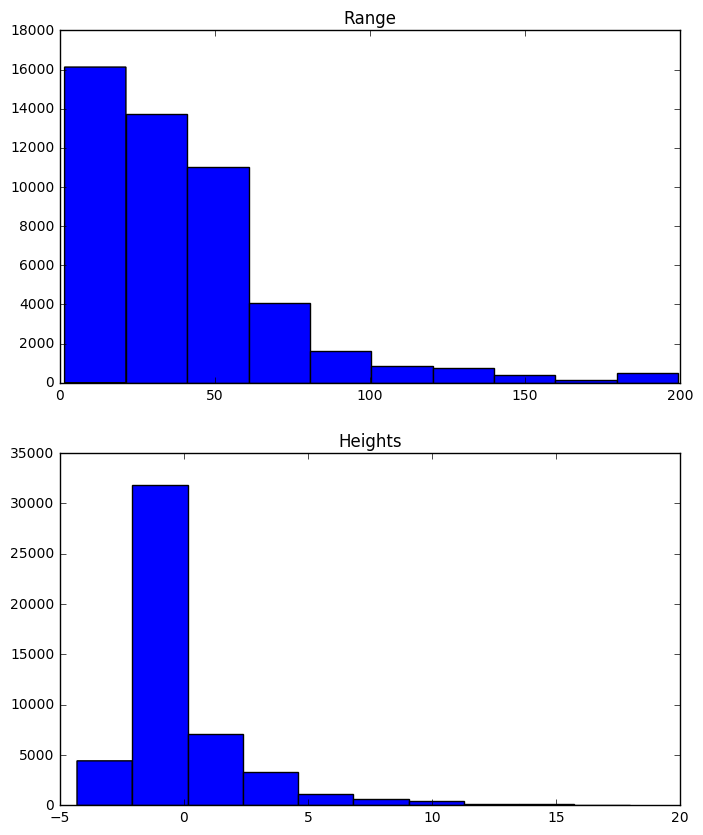

In [3]:
dist = np.linalg.norm(points, axis=0) 
heights = points[2, :]

plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.hist(dist)
plt.title('Range')
plt.subplot(212)
plt.hist(heights)
plt.title('Heights')